In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from time import time

In [2]:
pd.set_option('mode.chained_assignment', None)

In [3]:
Ip1=pd.read_csv("D:\Assignment 3\lp11.csv")
dfnew1=Ip1[["Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6"]].copy()
df1=dfnew1.dropna()
df1["F_vec"]=np.sqrt((df1["Unnamed: 1"]**2+df1["Unnamed: 2"]**2+df1["Unnamed: 3"]**2))
df1["T_vec"]=np.sqrt((df1["Unnamed: 4"]**2+df1["Unnamed: 5"]**2+df1["Unnamed: 6"]**2))
df11=Ip1["dummy"]

In [4]:
df1=df1.reset_index(drop=True)
df1=df1.groupby(np.arange(len(df1))//15).mean()
df11=df11.dropna().reset_index(drop=True)

In [5]:
df1["Classes"]=df11

In [6]:
df1main=df1[["Classes","F_vec","T_vec"]].copy()

obstruction     34
normal          21
collision       17
fr_collision    16
Name: Classes, dtype: int64


array([[<AxesSubplot:title={'center':'collision'}>,
        <AxesSubplot:title={'center':'fr_collision'}>],
       [<AxesSubplot:title={'center':'normal'}>,
        <AxesSubplot:title={'center':'obstruction'}>]], dtype=object)

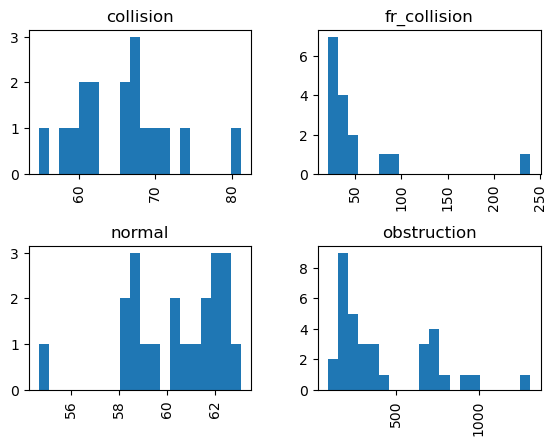

In [7]:
print(df1main['Classes'].value_counts())
df1main.hist(column='F_vec', bins=20, by='Classes')
#df1main.describe()

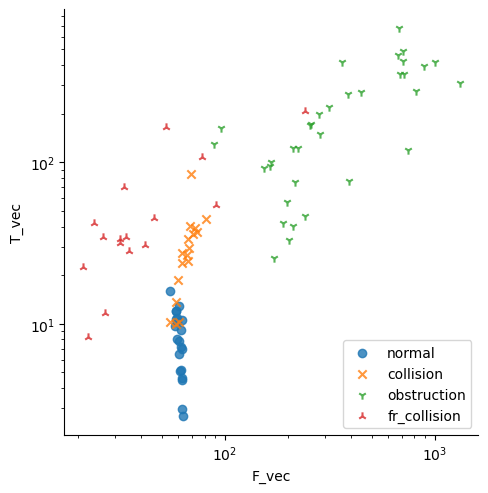

In [8]:
import seaborn as sns
grid=sns.lmplot( x="F_vec", y="T_vec", data=df1main, fit_reg=False, hue="Classes", legend=False, markers=["o", "x", "1","2",])
plt.legend(loc='lower right')
grid.set(xscale="log", yscale="log")
plt.show()

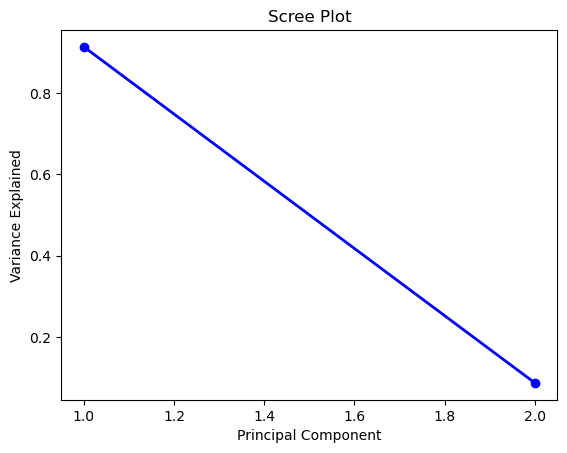

[0.91312986 0.08687014]


In [9]:
df1_pca=df1main.iloc[:,1:3]
scaler = StandardScaler()
df1_pca=pd.DataFrame(scaler.fit_transform(df1_pca))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df1_pca)
pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pca.explained_variance_ratio_)

In [10]:
data_fin = pd.DataFrame( columns = [ 'pca1','class'])
data_fin['pca1'] = pca_df['PC1']
data_fin['class'] = df1["Classes"]
data_fin.to_csv('D:\Assignment 3\lp1_pca.csv',index=False)

In [11]:
from sklearn import preprocessing
e=preprocessing.LabelEncoder()
Y=e.fit_transform(df1main.Classes)
X=df1main.iloc[:,1:3].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
ann = tf.keras.models.Sequential()

In [13]:
ann.add(tf.keras.layers.Dense(units=120,activation="relu"))

In [14]:
ann.add(tf.keras.layers.Dense(units=120,activation="relu"))

In [15]:
ann.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [16]:
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [17]:
start = time()
ann.fit(X_train,Y_train,batch_size=25,epochs = 80)
print(time()-start)

Epoch 1/80
3/3 [==============================] - 1s 4ms/step - loss: 1.3419 - accuracy: 0.3571
Epoch 2/80
3/3 [==============================] - 0s 3ms/step - loss: 1.2677 - accuracy: 0.5000
Epoch 3/80
3/3 [==============================] - 0s 2ms/step - loss: 1.2078 - accuracy: 0.5000
Epoch 4/80
3/3 [==============================] - 0s 4ms/step - loss: 1.1581 - accuracy: 0.5000
Epoch 5/80
3/3 [==============================] - 0s 3ms/step - loss: 1.1225 - accuracy: 0.5000
Epoch 6/80
3/3 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.5286
Epoch 7/80
3/3 [==============================] - 0s 2ms/step - loss: 1.0595 - accuracy: 0.5286
Epoch 8/80
3/3 [==============================] - 0s 495us/step - loss: 1.0341 - accuracy: 0.5571
Epoch 9/80
3/3 [==============================] - 0s 4ms/step - loss: 1.0165 - accuracy: 0.5714
Epoch 10/80
3/3 [==============================] - 0s 2ms/step - loss: 0.9956 - accuracy: 0.5857
Epoch 11/80
3/3 [====================

In [18]:
y_pred=ann.predict(X_test)
a=np.argmax(y_pred,axis=1)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,a)
print(accuracy)

1/1 [==============================] - 0s 79ms/step
0.7777777777777778
